## 1. To find trend and seasonality in the target variable

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df1=pd.read_excel('/home/ayushi/Downloads/RE/R1.xlsx',sheet_name='Sheet1', header=1)

In [9]:
df1 = df1.iloc[:-1] # deleting last row

In [6]:
# df1.to_csv('shipped.csv')

In [52]:
df1['Calendar Year Month']=pd.to_datetime(df1['Calendar Year Month'],format='%Y%m')
df1=df1.set_index('Calendar Year Month')

In [73]:
df1.columns

Index(['Product Line Desc (M)', 'Product Class Desc (M)',
       'Sales District Desc (M) ', 'ABC indicator', 'Unnamed: 5', 'USD',
       'USD.1', 'USD.2', 'USD.3', 'USD.4', 'USD.5', 'Unnamed: 12'],
      dtype='object')

In [53]:
df1.head()

,Product Line Desc (M),Product Class Desc (M),Sales District Desc (M),ABC indicator,Unnamed: 5,USD,USD.1,USD.2,USD.3,USD.4,USD.5,Unnamed: 12
Calendar Year Month,,,,,,,,,,,,
2017-01-01,Arresters,#,North East Region,##,0.00,0.0,0.00,0.0,536.34,0.0,0.0,536.34
2017-01-01,Arresters,Blocks,EuropeMidEastAfrica,B,0.00,0.0,0.00,0.0,23040.00,23040.0,15360.0,61440.00
2017-01-01,Arresters,Blocks,EuropeMidEastAfrica,C,60588.00,60588.0,0.00,0.0,25486.20,46656.0,190256.0,322986.20
2017-01-01,Arresters,Blocks,North East Region,C,0.00,0.0,0.00,0.0,5691.00,0.0,0.0,5691.00
2017-01-01,Arresters,Distribution Arresters,APAC,1,9963.52,0.0,9963.52,0.0,0.00,0.0,0.0,9963.52


In [75]:
df1.groupby('Product Line Desc (M)')['Product Class Desc (M)'].unique()

Product Line Desc (M)
Arresters             [#, Blocks, Distribution Arresters, Substation...
Cable Accessories                      [URD Accessories, URD Arresters]
Connectors            [Aluminium Loops, Distribution Connectors, Pla...
Construction          [#, Atlas, Civil, Pole Line Hardware, Utility ...
Insulators            [Distribution Insulators, Transmission Insulat...
Safety Products       [Fiber Splice Products, Fiberglass Constructio...
Switching & Fusing    [Cutouts, Cutouts - Polymer, Fuse Links, OVHD ...
Name: Product Class Desc (M), dtype: object

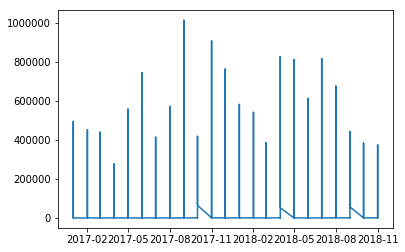

In [57]:
plt.plot(df1['Unnamed: 5'])

here data is biased towards zero, this indicates that there are many zero values in target variable

## checking for zero values

In [58]:
df1[df1['Unnamed: 5']==0.0].count()[4]

13036

In [59]:
df1.shape[0]

30117

from above code it is clear that approximately 43% of target variable is zero

After analyzing data manually,It is found that 'Product Line Desc (M)'having category Bushing,Enclosures & Drains
,Utility Automation and Wire Management have more than 50 % of zero values. So it is better to remove these categories and reanalyse target variable

In [60]:
df1=df1.loc[df1['Product Line Desc (M)'].isin(['Arresters', 'Cable Accessories', 'Connectors',
       'Construction', 'Insulators',
       'Safety Products', 'Switching & Fusing'])] # removingBushing,Enclosures & Drains , Utility Automation and Wire Management 

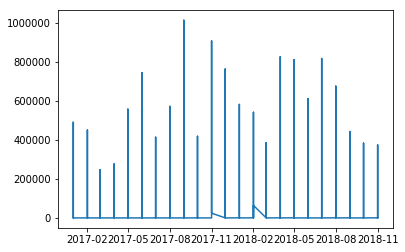

In [61]:
plt.plot(df1['Unnamed: 5'])

## still no trend and seasonality is found

## Stationary
2.Trying to find, if data become stationary after differencing, taking period=1

A common assumption in many time series techniques is that the data are stationary.
A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality).

For practical purposes, stationarity can usually be determined from a run sequence plot.

Transformations to Achieve Stationarity	If the time series is not stationary, we can often transform it to stationarity with one of the following techniques.
We can difference the data. That is, given the series Zt, we create the new series

Yi=Zi−(Zi−1)

The differenced data will contain one less point than the original data. Although you can difference the data more than once, one difference is usually sufficient.
If the data contain a trend, we can fit some type of curve to the data and then model the residuals from that fit. Since the purpose of the fit is to simply remove long term trend, a simple fit, such as a straight line, is typically used.
For non-constant variance, taking the logarithm or square root of the series may stabilize the variance. For negative data, you can add a suitable constant to make all the data positive before applying the transformation. This constant can then be subtracted from the model to obtain predicted (i.e., the fitted) values and forecasts for future points.
The above techniques are intended to generate series with constant location and scale. Although seasonality also violates stationarity, this is usually explicitly incorporated into the time series model.

In [64]:
t_diff=df1['Unnamed: 5'].diff(periods=1)

In [66]:
t_diff=t_diff[1:]  # removing first row because first row is Nan

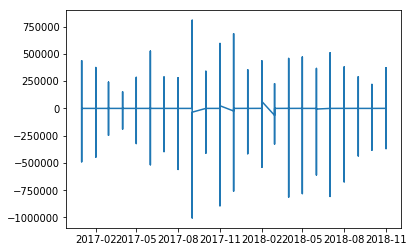

In [67]:
plt.plot(t_diff)

there is no stationarity in data, because if data is stationary then value decrease immediately

## checking if there is an autocorrelation between values of target variable

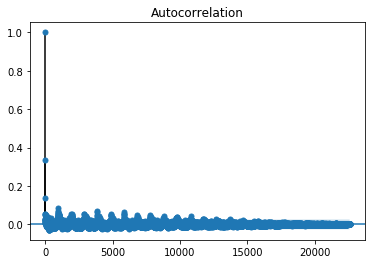

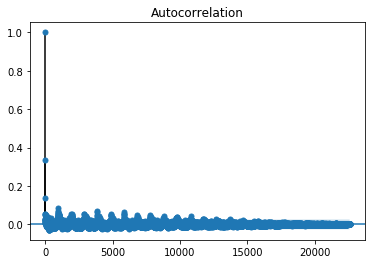

In [69]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1['Unnamed: 5'])

/home/ayushi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


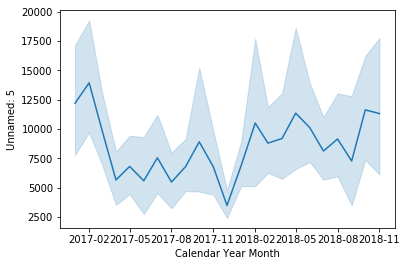

In [71]:
a=df1[df1['Product Line Desc (M)']=='Arresters']
sns.lineplot(x=a.index,y=a['Unnamed: 5'])

/home/ayushi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


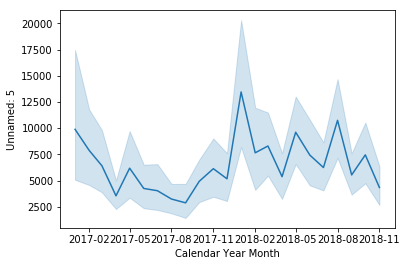

In [70]:
a=df1[df1['Product Line Desc (M)']=='Cable Accessories']
sns.lineplot(x=a.index,y=a['Unnamed: 5'])

Now if we look at above graph of product line - Arrester and cable Accessories, there is no specific trend or seasonality.